该脚本提供了若干种给地震、台站、数据添加权重的方法

This script provides several methods to add weights to earthquake, station and traveltime data

In [45]:
# load functions for data processing
%run ../utils/functions_for_data.ipynb

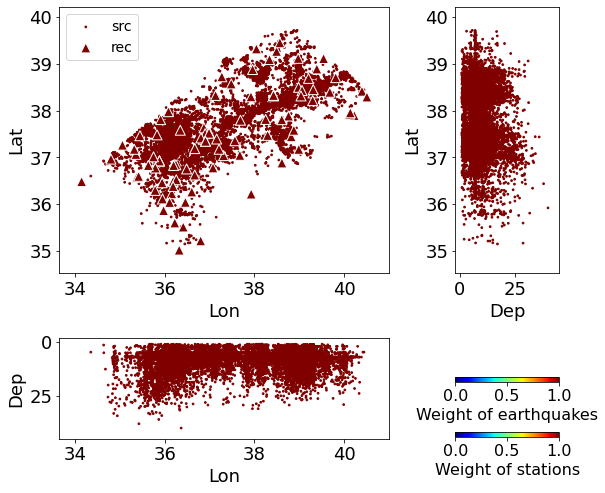

In [46]:
# 读取数据文件 read .dat file
fname = "output_data/alg3_src_rec.dat"
[ev_info_obs, st_info_obs] = read_src_rec_file(fname)

# 权重分布画图 plot weight distribution
fig_ev_st_distribution_wt(ev_info_obs, st_info_obs)


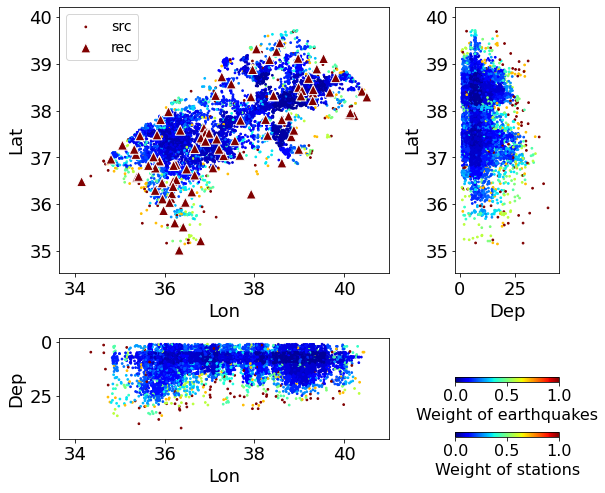

In [47]:
# 选项1 (推荐)，给地震增加 box weighting. 将区域划分为若干个box，每个box内的台站权重相同，均设置为 1/sqrt(N)，其中 N 是该box内台站总数量。
# Option 1 (recommended) , assign box weighting to the earthquake. Divide the region into several boxes, and the station weights in each box are the same, all set to 1/sqrt(N), where N is the total number of stations in the box.

# box size is dlon*dlat*ddep (degree, degree, km)
dlon = 0.4; dlat = 0.4; ddep = 5
ev_info_obs = box_weighting_ev(ev_info_obs,dlon,dlat,ddep)

# 权重分布画图 plot weight distribution
fig_ev_st_distribution_wt(ev_info_obs, st_info_obs)


In [48]:
# # 选项2，给地震增加 geographical weighting (粗糙版). inspired by [Youyi Ruan et al., 2019, GJI]
# # Option 2, assign geographical weighting to the earthquake roughly.

# # box size is dlon*dlat*ddep (degree, degree, km)
# dlon = 0.2; dlat = 0.2; ddep = 5
# ev_info_obs = geographical_weighting_ev_rough(ev_info_obs,dlon,dlat,ddep)

# # 权重分布画图 plot weight distribution
# fig_ev_st_distribution_wt(ev_info_obs, st_info_obs)


In [49]:
# # 选项3，不对地震加权，而是对地震做 declustering. 将区域划分为若干个subdomain，按照到时数量排序，每个box内仅保留到时数量最多的若干个的地震，
# # option 3, declustering. Divide the region into several subdomains, retain the top N earthquakes in terms of the number of arrival times in each subdomain.

# dlon = 0.02; dlat = 0.02; ddep = 1;  # subdomain size (degree, degree, km)
# Top_N = 1 # retain the top N earthquakes in each subdomain
# ev_info_obs = limit_earthquake_decluster_Nt(ev_info_obs, dlon, dlat, ddep,Top_N)

# # 权重分布画图 plot weight distribution
# fig_ev_st_distribution_wt(ev_info_obs, st_info_obs)

In [50]:
# # 选项4，对台站加权 box_weighting. add box weighting to the stations.
# # Option 5 (recommended), add box weighting to the stations

# # box size is dlon*dlat*ddep (degree, degree, km)
# dlon = 0.2; dlat = 0.2; 
# (ev_info_obs,st_info_obs) = box_weighting_st(ev_info_obs,st_info_obs,dlon,dlat)

# # 权重分布画图 plot weight distribution
# fig_ev_st_distribution_wt(ev_info_obs, st_info_obs)

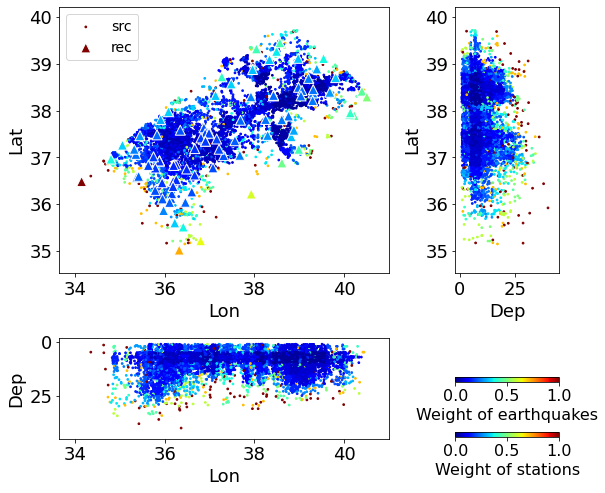

In [51]:
# 选项5 (推荐)，对台站加权 geographical_weighting.  [Youyi Ruan et al., 2019, GJI]
# Option 5 (recommended), add geographical weighting to the stations.

(ev_info_obs,st_info_obs) = geographical_weighting_st(ev_info_obs,st_info_obs)

# 权重分布画图 plot weight distribution
fig_ev_st_distribution_wt(ev_info_obs, st_info_obs)

In [52]:
# output data 输出数据
out_path = "output_data"

# 保存用于TomoATT反演的数据文件 save data for TomoATT
out_fname = "%s/alg4_src_rec.dat"%(out_path)
write_src_rec_file(out_fname,ev_info_obs,st_info_obs)

# 保存用于画图的地震列表文件 save earthquake list for plotting
out_fname_ev = "%s/alg4_ev_list.dat"%(out_path)
write_src_list_file(out_fname_ev,ev_info_obs)

# 保存用于画图的台站列表文件 save station list for plotting
out_fname_st = "%s/alg4_st_list.dat"%(out_path)
write_rec_list_file(out_fname_st,ev_info_obs,st_info_obs)

src_rec.dat has been outputed: 20531 events, 92 stations, 152262 abs traveltime, 0 cs_dif traveltime, 0 cr_dif traveltime. 
earthquake and station region, lat:   35.0 -   39.7, lon:   34.1 -   40.5, dep:   -1.9 -   40.0
